In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Data Loading

In [3]:
resign = pd.read_csv('/Users/jungmoon/Desktop/KAIST/5. 1학년 여름학기/금융데이터마이닝/resign.csv')
resign

,satisfaction,evaluation,project,workhour,years,accident,resign,promotion,good
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0
14995,0.37,0.48,2,160,3,0,1,0,0
14996,0.37,0.53,2,143,3,0,1,0,0
14997,0.11,0.96,6,280,4,0,1,0,1


In [4]:
# 데이터 요약
resign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   satisfaction  14999 non-null  float64
 1   evaluation    14999 non-null  float64
 2   project       14999 non-null  int64  
 3   workhour      14999 non-null  int64  
 4   years         14999 non-null  int64  
 5   accident      14999 non-null  int64  
 6   resign        14999 non-null  int64  
 7   promotion     14999 non-null  int64  
 8   good          14999 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [5]:
# 데이터 기초통계 분석
resign.describe()

,satisfaction,evaluation,project,workhour,years,accident,resign,promotion,good
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.648110
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.477576
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


## 1. PCA

In [6]:
# PCA를 위한 변수들의 타겟과 features로 분리
X_target = resign['resign']
X_features = resign.drop(['resign', 'good'], axis=1)

In [7]:
# features끼리 상관분석
corr = X_features.corr()
corr.iloc[:10,:10]

,satisfaction,evaluation,project,workhour,years,accident,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
workhour,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
years,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


<Axes: >

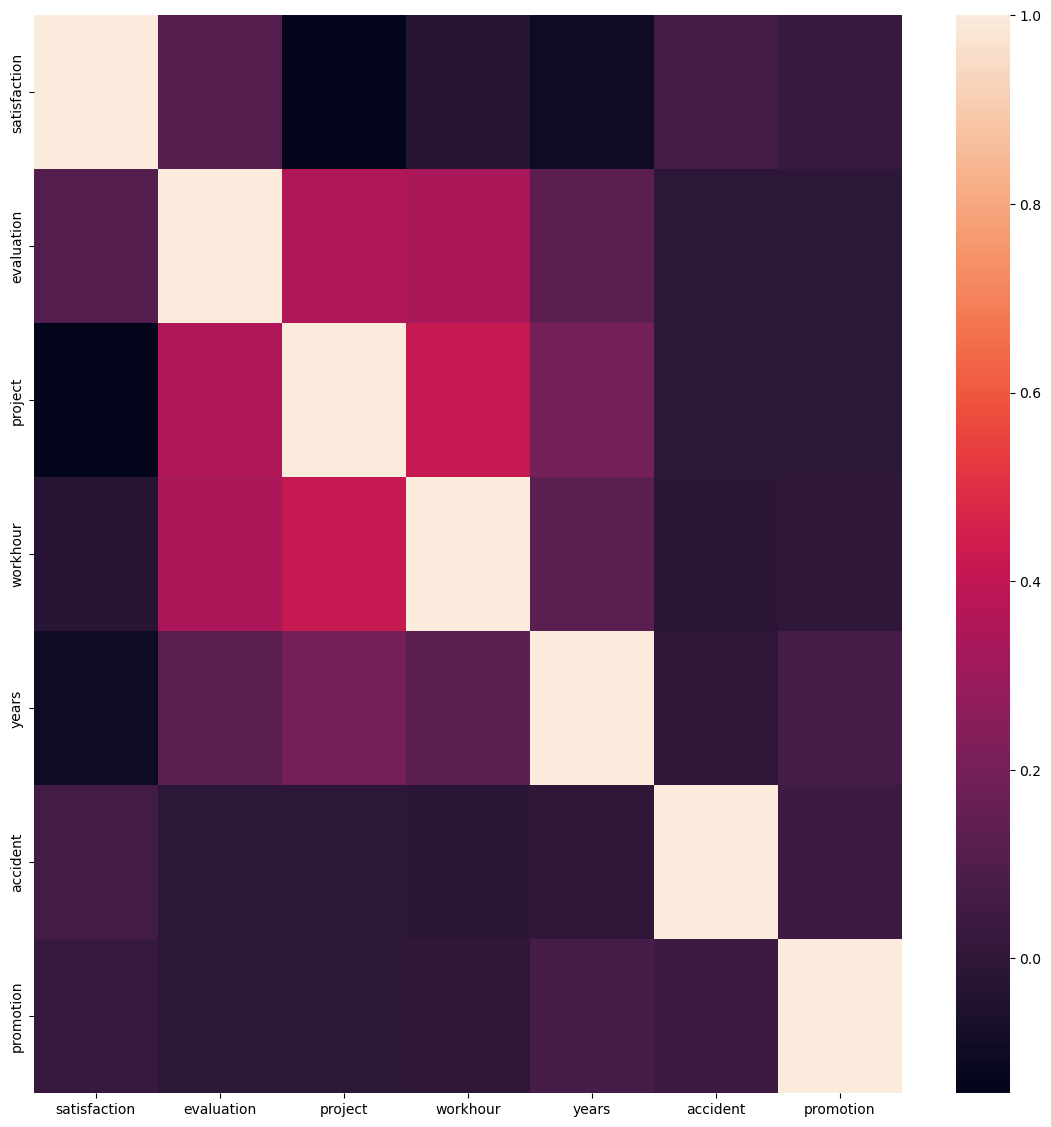

In [8]:
plt.figure(figsize=(14,14))
sns.heatmap(corr)

In [9]:
# PCA를 위한 스케일링
X_scaled = StandardScaler().fit_transform(X_features)

In [10]:
# 주성분 3개로 분리
pca = PCA(n_components=3)
resign_pca = pca.fit_transform(X_scaled)
resign_pca.shape

(14999, 3)

In [11]:
# 3개의 주성분으로 나뉘어진 값 확인
np.around(resign_pca[:10], decimals=3)

array([[-1.9  , -1.121, -0.08 ],
       [ 2.136,  0.249,  0.094],
       [ 3.059, -1.683, -0.302],
       [ 1.55 ,  0.126, -0.092],
       [-1.904, -1.168, -0.072],
       [-2.044, -1.091, -0.059],
       [ 1.992, -1.897, -0.139],
       [ 1.816,  0.803, -0.229],
       [ 1.886,  0.925, -0.261],
       [-2.079, -1.024, -0.063]])

In [12]:
# 각 주성분에 대한 각 변수들의 importance
np.around(pca.components_, decimals=3)

array([[-0.088,  0.507,  0.579,  0.549,  0.314, -0.019,  0.01 ],
       [ 0.798,  0.332, -0.103,  0.104, -0.284,  0.375,  0.106],
       [-0.094, -0.135, -0.023, -0.107,  0.425,  0.452,  0.758]])

In [13]:
resign_pca

array([[-1.90035018, -1.12083103, -0.0797787 ],
       [ 2.1358322 ,  0.2493369 ,  0.0936161 ],
       [ 3.05891625, -1.68312693, -0.301682  ],
       ...,
       [-2.0507165 , -1.182032  , -0.04594506],
       [ 2.91418496, -1.42752606, -0.36333357],
       [-1.91543672, -1.17021407, -0.07024077]])

## 1-(1) 전체 7개의 특성변수를 3개의 주성분 점수로 압축한 뒤, 이를 3차원 산점도로 시각화하여라. 단, 각 관찰치의 점의 색상이 resign 여부에 따라 다르게 표현되도록 하여라.

Text(0.5, 0, 'PC3')

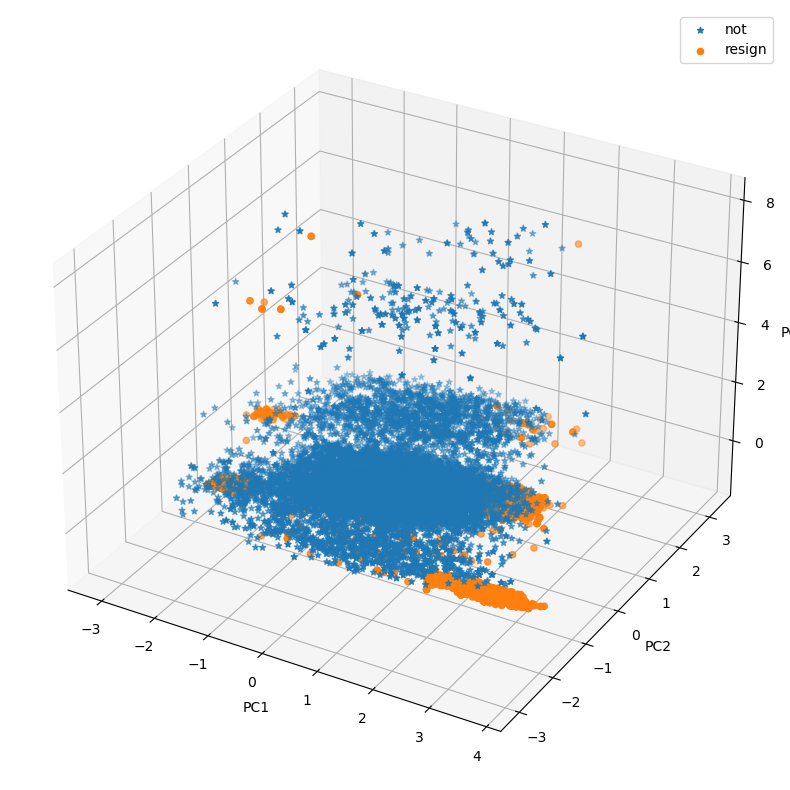

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
markers = ['*', 'o']
lab = ['not', 'resign']
for i, marker in enumerate(markers):
    x = resign_pca[X_target==i][:,0]
    y = resign_pca[X_target==i][:,1]
    z = resign_pca[X_target==i][:,2]
    ax.scatter(x, y, z, marker=marker, label=lab[i])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('PC3')

## 1-(2) 3개의 주성분 점수가 특성변수 전체의 변동 중 어느 만큼을 설명하는지 그 비율을 구하여라

In [15]:
# 각 주성분이 전체에서 얼마만큼의 설명력을 가지는지
pca.explained_variance_ratio_

# 각각 26.1%, 16.1%, 15.1%의 설명력을 가짐

array([0.26143604, 0.16093156, 0.1514701 ])

In [16]:
# 3개의 주성분이 전체 중에 57.3%를 설명함
pca.explained_variance_ratio_.sum()

0.5738377019304782

## 1-(3) 각 주성분 점수가 어떠한 경우에 큰 값을 가지는지를 특성변수 별 loading값을 이용하여 설명하여라.

Text(0.5, 1.0, '1st PC loadings')

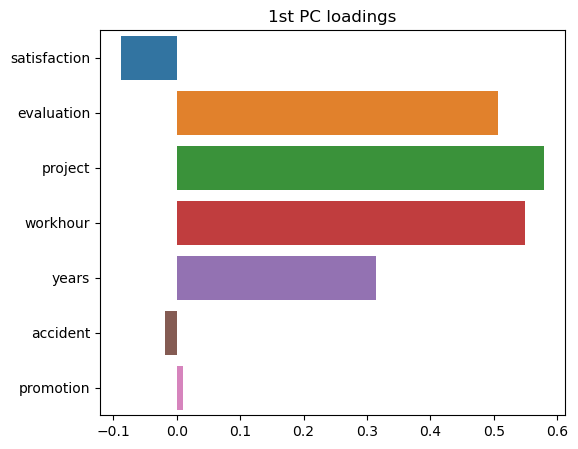

In [17]:
plt.figure(figsize=(6,5))
sns.barplot(x=pca.components_[0], y=X_features.columns).set_title('1st PC loadings')

# 첫 번째 주성분은 주로 인사평점과 프로젝트 수행횟수, 월평균업무시간, 근속연수를 중심으로 이루어졌다.
# 따라서, 해당 features가 큰 값을 가질수록 첫 번째 주성분 점수가 큰 값을 가진다.

Text(0.5, 1.0, '2nd PC loadings')

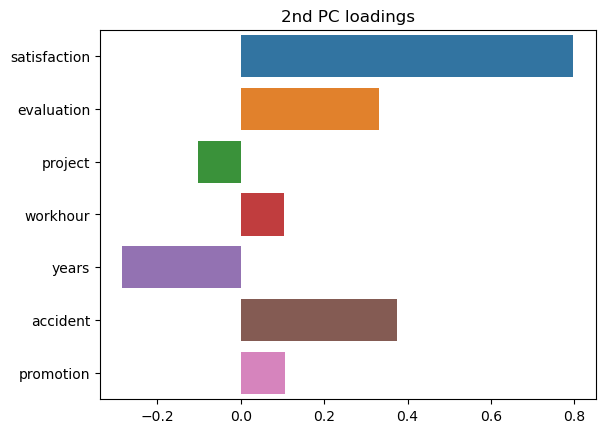

In [18]:
sns.barplot(x=pca.components_[1], y=X_features.columns).set_title('2nd PC loadings')

# 두 번째 주성분은 주로 업무만족도, 프로젝트 수행횟수가 적을수록, 월평균업무시간이 적을수록 커진다.

Text(0.5, 1.0, '3rd PC loadings')

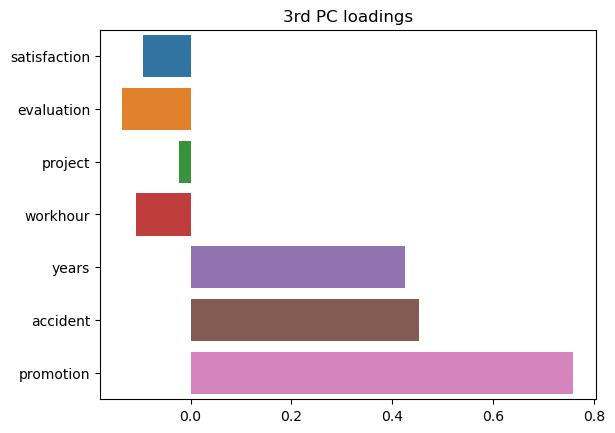

In [19]:
sns.barplot(x=pca.components_[2], y=X_features.columns).set_title('3rd PC loadings')

# 세 번째 주성분은 근속연수가 클수록, 최근5년이내 승진을 한 경우, 업무만족도가 낮을수록, 인사평점이 낮을수록 커진다.

## 2. K-means 군집분석

## 2-(1) SSE를 기준으로 적절한 군집의 개수 K를 선택하여라.

In [20]:
from sklearn.cluster import KMeans 
num_of_clusters = range(1, 10) 
error = []
for n_cl in num_of_clusters:
    clusters = KMeans(n_clusters=n_cl, n_init='auto') 
    clusters.fit(X_scaled)
    error.append(clusters.inertia_)
table = pd.DataFrame({"Cluster_Numbers" : num_of_clusters, "Error_Term" : error })
table

,Cluster_Numbers,Error_Term
0,1,104993.000000
1,2,87157.377266
2,3,75982.891490
3,4,59410.542690
4,5,49433.622999
5,6,42890.820819
6,7,39121.393612
7,8,37636.179028
8,9,34530.486812


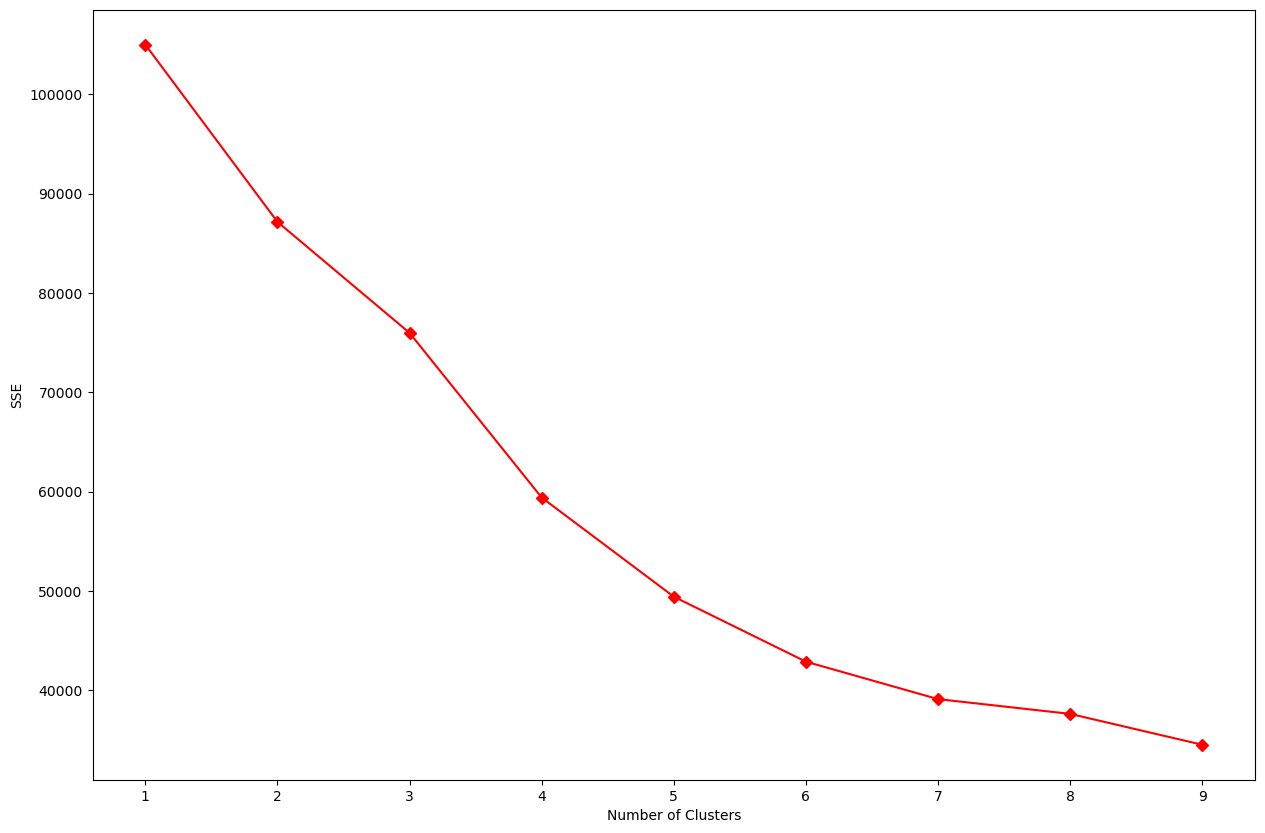

In [21]:
plt.figure(figsize=(15,10))
plt.plot(table.Cluster_Numbers, table.Error_Term, marker = "D", color='red') 
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

SSE 그래프가 완만해지는 5개를 K로 선정

## 2-(2) (1)에서 선택한 K 값을 이용하여 K Means 군집분석을 수행하여라.

In [22]:
kmcl = KMeans(n_clusters=5, n_init='auto') 
kmcl.fit(X_scaled)

KMeans(n_clusters=5, n_init='auto')

In [23]:
cl_label_kM = kmcl.labels_ 
cl_label_kM

array([2, 1, 1, ..., 2, 1, 2], dtype=int32)

In [24]:
np.unique(cl_label_kM)

array([0, 1, 2, 3, 4], dtype=int32)

In [25]:
resign['cluster_kM'] = cl_label_kM 
resign

,satisfaction,evaluation,project,workhour,years,accident,resign,promotion,good,cluster_kM
0,0.38,0.53,2,157,3,0,1,0,0,2
1,0.80,0.86,5,262,6,0,1,0,1,1
2,0.11,0.88,7,272,4,0,1,0,1,1
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,2
14995,0.37,0.48,2,160,3,0,1,0,0,2
14996,0.37,0.53,2,143,3,0,1,0,0,2
14997,0.11,0.96,6,280,4,0,1,0,1,1


## 2-(3) 문제 1에서 도출한 3개의 주성분 점수에 대한 3차원 산점도에서 각 관찰치의 점의 색상이 (2)에서 도출된 군집에 따라 다르게 표현되도록 하여라.

In [26]:
resign['cluster_kM'] == 1

0        False
1         True
2         True
3         True
4        False
         ...  
14994    False
14995    False
14996    False
14997     True
14998    False
Name: cluster_kM, Length: 14999, dtype: bool

In [27]:
resign

,satisfaction,evaluation,project,workhour,years,accident,resign,promotion,good,cluster_kM
0,0.38,0.53,2,157,3,0,1,0,0,2
1,0.80,0.86,5,262,6,0,1,0,1,1
2,0.11,0.88,7,272,4,0,1,0,1,1
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,2
14995,0.37,0.48,2,160,3,0,1,0,0,2
14996,0.37,0.53,2,143,3,0,1,0,0,2
14997,0.11,0.96,6,280,4,0,1,0,1,1


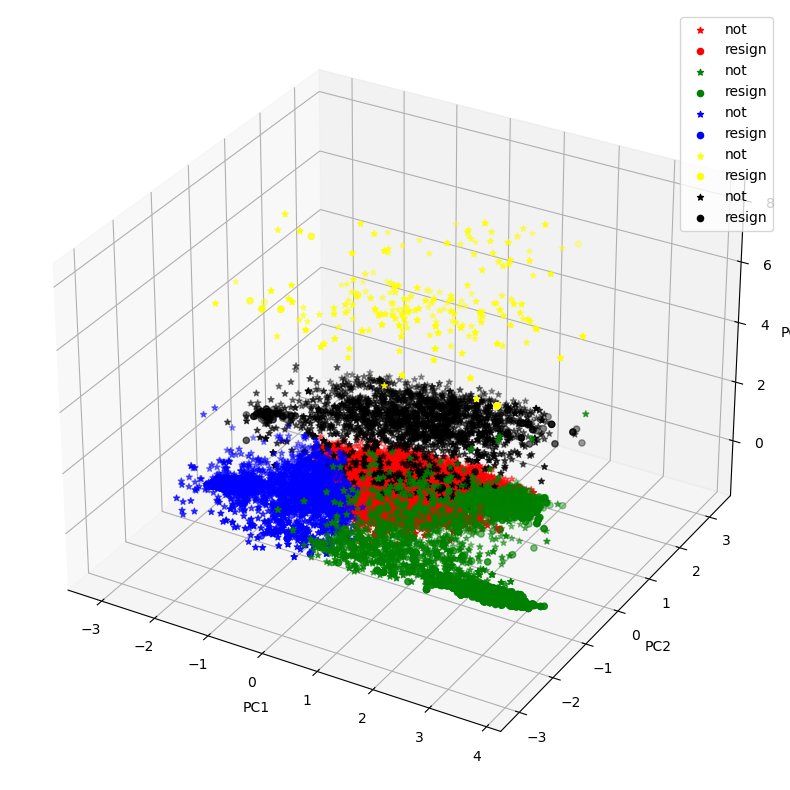

In [31]:
#3차원 산점도로 시각화

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
markers = ['*', 'o']
lab = ['not', 'resign']
col = np.array(['red', 'green', 'blue', 'yellow', 'black'])
for j in range(5):
    for i, marker in enumerate(markers):
        x = resign_pca[(X_target==i) & (cl_label_kM==j)][:,0]
        y = resign_pca[(X_target==i) & (cl_label_kM==j)][:,1]
        z = resign_pca[(X_target==i) & (cl_label_kM==j)][:,2]
        ax.scatter(x,y,z, marker=marker, label=lab[i], color=col[j])

plt.legend()
plt.xlabel('PC1') 
plt.ylabel('PC2') 
ax.set_zlabel('PC3')
plt.show()

## 2-(4) K 개의 군집 각각에 대하여 타겟변수인 resign의 값이 1인 비중을 구하고, 군집 별로 퇴사한 직원의 비율에 차이가 있는지 비교하여라.

In [32]:
count_cl = resign.groupby('cluster_kM')['resign'].count()
count_cl

cluster_kM
0    6382
1    2984
2    3280
3     319
4    2034
Name: resign, dtype: int64

In [33]:
resign_portion = resign.groupby('cluster_kM')['resign'].sum()
resign_portion

cluster_kM
0     236
1    1688
2    1495
3      19
4     133
Name: resign, dtype: int64

In [34]:
resign_portion/count_cl

cluster_kM
0    0.036979
1    0.565684
2    0.455793
3    0.059561
4    0.065388
Name: resign, dtype: float64

군집2와 군집4가 퇴사자의 비율이 약 50%인 곳이며, 나머지는 10%가 채 되지 않는 군집들이다.

## 3. 퇴사여부 예측

## 3-(1) 전체 데이터 중 80%를 training 자료, 20%를 test 자료로 랜덤하게 분할하여라.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, X_target, test_size=0.2, random_state=0)

## 3-(2) (2)training 자료를 이용하여 Logistic Regression을 훈련하여라.

In [36]:
scaler = StandardScaler()

In [37]:
# 정규화(X_train만 scaler에 fit 시켜주고, test는 transform만 적용해줌)
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(penalty=None)
lr_clf.fit(X_train_Scaled, y_train)
lr_clf.coef_

array([[-1.02052126,  0.12577099, -0.37441486,  0.21929018,  0.33398616,
        -0.51320879, -0.2434465 ]])

## 3-(3) (3)training 자료를 이용하여 Decision Tree를 훈련하여라. 단, 모델의 하이퍼파라미터들을 5-fold CV를 적용하여 튜닝할 것.

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=500, max_depth=4)

In [40]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=500, random_state=156)

In [41]:
# 5-fold CV 적용, 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,4,5], 'min_samples_split':[300,500,1000]}
dt_clf2 = DecisionTreeClassifier(random_state=123)
grid_dt = GridSearchCV(dt_clf2, param_grid=parameters, cv=5, scoring='f1', refit=True)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'max_depth': 5, 'min_samples_split': 300}
0.9416231635153359


In [42]:
dt_clf_update = grid_dt.best_estimator_

## 3-(4) (3)의 결과로 얻어진 트리를 시각화 하고, 해석하여라.

In [43]:
X_train.columns

Index(['satisfaction', 'evaluation', 'project', 'workhour', 'years',
       'accident', 'promotion'],
      dtype='object')

In [46]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt_clf_update,
    out_file='mytree.dot',
    class_names=['no', 'yes'],
    feature_names=X_train.columns,
    impurity=True, filled=True)

In [47]:
import graphviz
treedot = graphviz.Source(open('mytree.dot').read())

In [50]:
conda install python-graphviz

failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


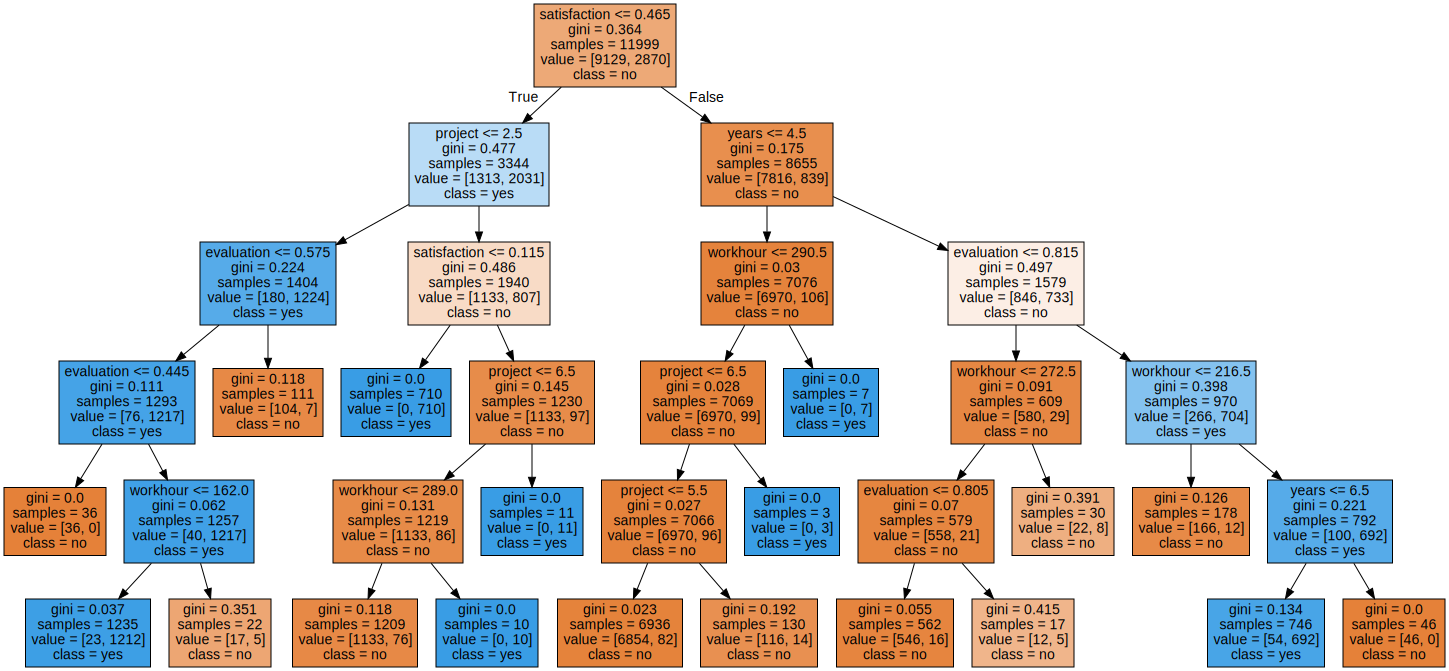

In [51]:
treedot

In [54]:
pd.Series(dt_clf_update.feature_importances_, index=X_train.columns).sort_values(ascending=False)

satisfaction    0.531889
years           0.156778
evaluation      0.149958
project         0.096200
workhour        0.065176
accident        0.000000
promotion       0.000000
dtype: float64

만족도 변수가 퇴사여부에 가장 예측력이 크며, 다음으로 근속연수, 인사평점, 프로젝트 수행횟수가 영향을 많이 준다.
한 줄만 해석을 해보자면,
만족도가 0.465보다 작고, 프로젝트 수행횟수가 2.5회보다 작으며, 인사평점이 0.575보다 크면 퇴사를 하지 않는다로 혼탁도(지니지수) 0.118까지 낮추는 정확도로 분류가 된다.

## 3-(5) training 자료를 이용하여 Random Forest를 훈련하여라. 단, 모델의 하이퍼파라미터들을 5-fold CV를 적용하여 튜닝할 것.



In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, oob_score=True)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [56]:
parameters = {'n_estimators':[50,100,150], 'max_depth':[3,4,5], 'min_samples_split':[300,500,1000]}
rf_clf2 = RandomForestClassifier(random_state=251)
grid_rf = GridSearchCV(rf_clf2, param_grid=parameters, cv=5, scoring='f1', refit=True)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 5, 'min_samples_split': 300, 'n_estimators': 100}
0.9400611923648492


In [57]:
rf_update = grid_rf.best_estimator_

In [58]:
pd.Series(rf_update.feature_importances_, index=X_train.columns).sort_values(ascending=False)

satisfaction    0.365157
project         0.202119
years           0.180896
workhour        0.137041
evaluation      0.107913
accident        0.006481
promotion       0.000393
dtype: float64

역시나 만족도가 가장 중요하게 퇴사에 영향을 미치며, 프로젝트 횟수, 근속연수가 뒤를 이었다. 반면, 인사평점은 DT와는 달리 5번째로 영향을 주는 변수로 판단되었다.
f1스코어 기준으로 평가하면, DT가 아주 조금 더 성능이 좋다.

## 3-(7) training 자료를 이용하여 AdaBoost를 훈련하여라. 단, training 자료에 5-fold CV를 적용하여, 모델의 하이퍼파라미터를 튜닝할 것.

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=10, random_state=234, algorithm='SAMME.R')

In [60]:
n_ests = {'n_estimators':[5,10,20,30,50]}
ada_clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=234, algorithm='SAMME.R')
grid_ada = GridSearchCV(ada_clf2, param_grid=n_ests, cv=5, scoring='f1', refit=True)
grid_ada.fit(X_train, y_train)
print(grid_ada.best_params_)
print(grid_ada.best_score_)

{'n_estimators': 30}
0.911760815009892


In [61]:
ada_update = grid_ada.best_estimator_

In [62]:
pd.Series(ada_update.feature_importances_, index=X_train.columns).sort_values(ascending=False)

satisfaction    0.300000
workhour        0.233333
evaluation      0.166667
project         0.166667
years           0.100000
accident        0.033333
promotion       0.000000
dtype: float64

## 3-(8) test 자료를 이용하여 (2), (3), (5), (7)의 각 모델 별 성능을 구하여라. 성능 평가를 위해 f1 score와 precision-recall curve를 활용할 것.

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

### F1 score 비교

In [64]:
# Logistic Regression 성능
y_pred_lr = lr_clf.predict(X_test_Scaled)
f1_lr = f1_score(y_test, y_pred_lr)
print('LR성능=', f1_lr)

LR성능= 0.3314393939393939


In [65]:
# DecisionTree 성능
y_pred_dt = dt_clf_update.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt)
print('DT성능=', f1_dt)

DT성능= 0.9432314410480349


In [66]:
# RandomForest 성능
y_pred_rf = rf_update.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf)
print('RF성능=', f1_rf)

RF성능= 0.9412639405204462


In [67]:
# AdaBoost 성능
y_pred_ada = ada_update.predict(X_test)
f1_ada = f1_score(y_test, y_pred_ada)
print('ADA성능=', f1_ada)

ADA성능= 0.9189964157706092


### Precision-Recall curve 비교

0.49209065336367885

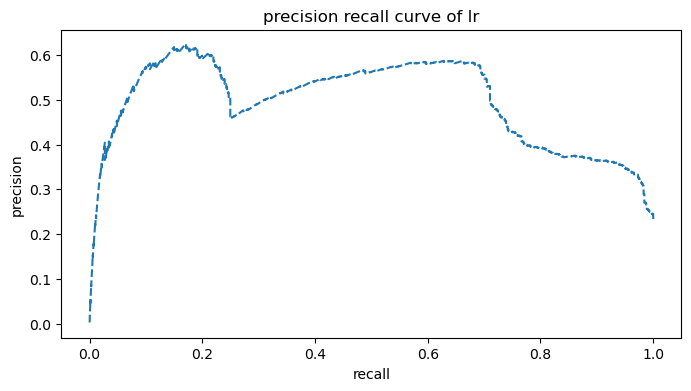

In [68]:
# Logistic regression p-r curve
y_pred_lr_proba1 = lr_clf.predict_proba(X_test_Scaled)[:,1]
precisions_lr, recalls_lr, thres = precision_recall_curve(y_test, y_pred_lr_proba1)
thres_n = thres.shape[0]
plt.figure(figsize=(8,4))
plt.plot(recalls_lr[0:thres_n],  precisions_lr[0:thres_n], linestyle='--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve of lr')

auc(recalls_lr, precisions_lr)

0.9656774864252194

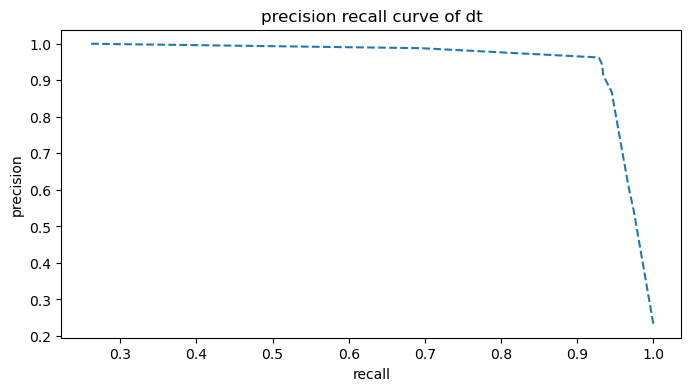

In [69]:
# DecisionTree p-r curve
y_pred_dt_proba1 = dt_clf_update.predict_proba(X_test)[:,1]
precisions_dt, recalls_dt, thres = precision_recall_curve(y_test, y_pred_dt_proba1)
thres_n = thres.shape[0]
plt.figure(figsize=(8,4))
plt.plot(recalls_dt[0:thres_n],  precisions_dt[0:thres_n], linestyle='--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve of dt')

auc(recalls_dt, precisions_dt)

0.9668772151948563

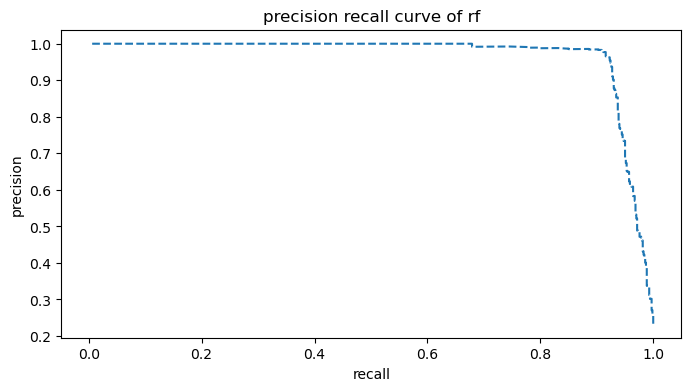

In [70]:
# RandomForest p-r curve
y_pred_rf_proba1 = rf_update.predict_proba(X_test)[:,1]
precisions_rf, recalls_rf, thres = precision_recall_curve(y_test, y_pred_rf_proba1)
thres_n = thres.shape[0]
plt.figure(figsize=(8,4))
plt.plot(recalls_rf[0:thres_n],  precisions_rf[0:thres_n], linestyle='--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve of rf')

auc(recalls_rf, precisions_rf)

0.9601754807902567

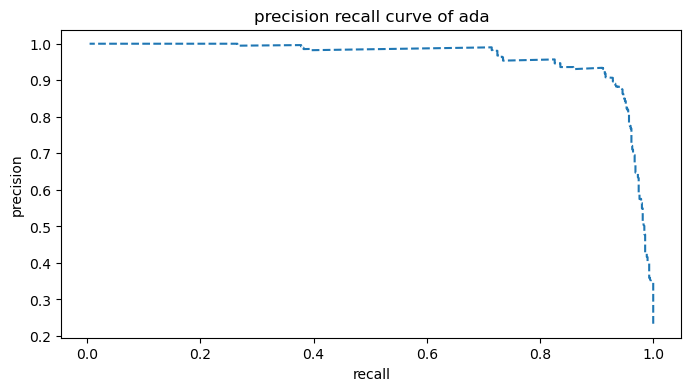

In [71]:
# AdaBoost p-r curve
y_pred_ada_proba1 = ada_update.predict_proba(X_test)[:,1]
precisions_ada, recalls_ada, thres = precision_recall_curve(y_test, y_pred_ada_proba1)
thres_n = thres.shape[0]
plt.figure(figsize=(8,4))
plt.plot(recalls_ada[0:thres_n],  precisions_ada[0:thres_n], linestyle='--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve of ada')

auc(recalls_ada, precisions_ada)

## 3-(9) (8)의 결과에서 가장 성능이 좋은 모델이 무엇인지 언급하고, 그 모델이 resign 데이터를 잘 예측할 수 있었던 이유가 무엇인지에 관하여 서술하여라.

1. f1_score
- lr: 0.33
- dt: 0.943
- rf: 0.941
- ada: 0.92

2. Area Under Precision-recall curve
- lr: 0.492
- dt: 0.965
- rf: 0.966
- ada: 0.96

f1_score는 decision-tree가, auc는 random-forest가 가장 성능이 좋은 모델로 꼽힌다.
의사결정나무는 데이터셋이 비교적 간단하고, 데이터 특성 간 비선형적인 패턴을 보일 때 강점을 보인다. 따라서 resign 데이터를 잘 예측할 수 있다.
하지만, 의사결정나무는 과적합문제나 복잡한 데이터셋에서 약점을 보일 수 있는데, 이를 해결하기 위해 랜덤포레스트가 등장했다.
랜덤포레스트는 부트스트랩 방식을 적용한 의사결정나무 배깅에 기반을 두고 있으나, 배깅보다 더 많은 무작위성을 주기 위해 의사결정나무의 각 노드에서 특성변수를 선택할 때 무작위성을 더한 방식을 통해 개별 Classifier간 연관성이 낮아지고, 개별 Classifier가 더욱 다양해지게 하였다.
따라서, 랜덤포레스트 또한 의사결정나무와 같거나 더 우수한 성능을 보인다.